<a href="https://colab.research.google.com/github/vvilliscool/ML_LIB_Class_Goorm/blob/master/goorm_20220802_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import display, Image

In [2]:
## 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

Unknown System


In [3]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

print("numpy 버전 : ", np.__version__)
print("matplotlib 버전 : ", matplotlib.__version__)

# 설치가 안되어 있을 경우, 설치 필요.
import mglearn
import sklearn
print("sklearn 버전 : ",  sklearn.__version__)
print("mglearn 버전 : ",  mglearn.__version__)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

numpy 버전 :  1.21.6
matplotlib 버전 :  3.2.2
sklearn 버전 :  1.0.2
mglearn 버전 :  0.1.9


## Boston 데이터셋

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()
X = boston.data       # 입력 데이터  - 문제
y = boston.target     # 출력 데이터  - 답

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [7]:
print( boston.keys() )
print( boston.feature_names )

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

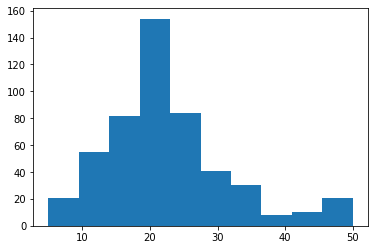

In [8]:
plt.hist(y)

### data split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                           test_size=0.3, random_state=42)

In [10]:
model = LinearRegression().fit(X_train, y_train)   # 학습
pred = model.predict(X_test)

In [11]:
pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

- 예측값이 0이하의 값이 있다. 이 경우 RMLSE에서 에러 발생. pred를 0이하는 0으로 처리한다.

In [12]:
pred[ pred < 0] = 0
pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049,  0.        , 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

In [13]:
import pandas as pd

In [14]:
dict_dat = {"실제값":y_test, "예측값":pred, "오차":y_test - pred}
dat = pd.DataFrame(dict_dat )
dat

,실제값,예측값,오차
0,23.6,28.648960,-5.048960
1,32.4,36.495014,-4.095014
2,13.6,15.411193,-1.811193
3,22.8,25.403213,-2.603213
4,16.1,18.855280,-2.755280
...,...,...,...
147,17.1,17.403672,-0.303672
148,14.5,13.385941,1.114059
149,50.0,39.983425,10.016575
150,14.3,16.682863,-2.382863


In [15]:
dat['오차절대값'] = abs(dat['오차'])
dat['오차제곱'] = dat['오차'] ** (2)
dat

,실제값,예측값,오차,오차절대값,오차제곱
0,23.6,28.648960,-5.048960,5.048960,25.491998
1,32.4,36.495014,-4.095014,4.095014,16.769138
2,13.6,15.411193,-1.811193,1.811193,3.280421
3,22.8,25.403213,-2.603213,2.603213,6.776718
4,16.1,18.855280,-2.755280,2.755280,7.591567
...,...,...,...,...,...
147,17.1,17.403672,-0.303672,0.303672,0.092216
148,14.5,13.385941,1.114059,1.114059,1.241127
149,50.0,39.983425,10.016575,10.016575,100.331779
150,14.3,16.682863,-2.382863,2.382863,5.678036


### 평가지표

- MAE(mean absolute error) : 평균 절대값 오차
- MSE(mean squared error) : 평균 제곱 오차
- RMSE(root mean squared error) : 평균 제곱근 오차
- RMLSE(Root Mean Squared Logarithmic Error)

In [16]:
import numpy as np

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 

In [17]:
# MAE
def mae_1(y_test, y_pred):
    error = y_test - y_pred
    abs_error = np.abs(error)
    mae_val = np.mean(abs_error)
    return mae_val

mae_1(y_test, pred)

3.114403581586861

In [18]:
print( sum(dat['오차절대값'])/len(dat['오차절대값']) )   # 방법1
print( np.mean(dat['오차절대값']) )                      # 방법2
mean_absolute_error(y_test, pred)                        # 방법3

3.114403581586863
3.114403581586861


3.114403581586861

In [19]:
# MSE
def mse_1(y_test, y_pred):
    error = y_test - y_pred
    error_2 = (error) ** 2
    mse_val = np.mean(error_2)
    return mse_val

mse_1(y_test, pred)

20.4611359169051

In [20]:
print( sum(dat['오차제곱'])/len(dat['오차제곱']) )   # 방법1
print( np.mean(dat['오차제곱']) )                    # 방법2
mse_val = mean_squared_error(y_test, pred)           # 방법3
mse_val

20.461135916905103
20.4611359169051


20.4611359169051

In [21]:
# RMSE
def rmse_1(y_test, y_pred):
    error = y_test - y_pred
    error_2 = (error) ** 2
    rmse_val = np.sqrt( np.mean(error_2) )
    return rmse_val

rmse_1(y_test, pred)

4.523398713014927

In [22]:
# (1) 제곱에 루트를 씌워구하기  (2) 제곱한 값을 길이로 나누기
rmse1 = np.sqrt(mse_val)
rmse2 = mse_val ** 0.5  # 다른 방법
print(rmse1, rmse2)

4.523398713014927 4.523398713014927


In [23]:
#MAPE
def MAPE(y_test, y_pred):
	return np.mean( np.abs((y_test - y_pred) / y_test)) * 100 

MAPE(y_test, pred)

15.85843795685619

In [24]:
# MPE
def MAE(y_test, y_pred): 
    return np.mean( (y_test - y_pred) / y_test ) * 100
    
MAE(y_test, pred)

-1.449465538825565

In [25]:
# RMLSE
def rmsle(y_test, y_pred): 
    log_y = np.log1p(y_test)
    log_pred = np.log1p(y_pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle
    
rmsle(y_test, pred)

0.35251688078990173